In [9]:
#########################################################################################################################################
#Group Project Part I: Support Vector Machines
#Completed by Paul Fernandez
#########################################################################################################################################
import numpy as np
import pandas as pd
import plotnine as pn

from sklearn.svm import SVC # "Support vector classifier"
from sklearn import svm
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, r2_score,mean_squared_error, classification_report, roc_auc_score
from sklearn import model_selection
from sklearn.model_selection import train_test_split, cross_val_score, KFold

df = pd.read_csv('heart.csv')                                                         #Goes over data file                                  
                                                                                     
data = df.drop(columns = ['target'])                                                 

df.target = (-1) * df.target                                                          #Manipulates target variable so that 0 is no heart disease and 1 was heart disease
df.target = 1 + df.target

x = data.values
y = df.target.values

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.25, random_state = 42)  #Splits data into portions for training the model and testing it

kf = KFold(n_splits=5, shuffle=True)
regressor = svm.SVC(kernel='linear', C=1).fit(x_train, y_train.ravel())               #Fits the training data to process support vectors
y_hat = regressor.predict(x_test)                                                     #Predicts support vector based off test data

print('R^2:',regressor.score(x_test, y_test))

R^2: 0.868421052631579


In [10]:
def mse(regressor, x_test, y):                                                         #Creates a function to solve for the mean squared error (MSE)
    y_hat = regressor.predict(x_test)
    error = np.mean((y - y_hat)**2)
    return error

res = cross_val_score(regressor, x, y.ravel(), cv = kf, scoring = mse)                 #Uses the MSE function to evaluate the cross validated MSE
cv_mse = res.mean()
res = cross_val_score(regressor, x, y.ravel(), cv = kf)                                #Finds the cross validated R^2 value
cv_r2 = res.mean()

roc = roc_auc_score(y, regressor.decision_function(x), multi_class="ovr",average=None) #Finds the area under the receiver operating characteristic curve

print('c-v R^2:', cv_r2, 'c-v MSE:', cv_mse)
print('AUC of ROC:', roc)

c-v R^2: 0.8284153005464481 c-v MSE: 0.17169398907103825
AUC of ROC: 0.9178304787000439


In [6]:
print(y_hat)                                                                            #Checks to see if the predictions were categorical

[1 0 0 1 0 0 0 1 1 0 0 1 0 1 0 0 0 1 1 1 0 1 1 0 0 0 0 0 1 0 1 1 1 1 0 1 0
 0 0 0 1 0 0 0 0 1 0 0 1 1 1 1 0 0 1 1 1 0 1 1 1 0 1 1 0 1 0 0 0 0 0 0 0 0
 1 0]


In [7]:
weight = regressor.coef_                                                                #Lists weight value for each variable
w = pd.DataFrame(weight, columns = ['age','sex','cp','trestbps','chol','fbs','restecg','thalach','exang','oldpeak','slope','ca','thal'], index = ['Weight Value'])
w

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
Weight Value,-0.0101,0.955351,-0.644899,0.014548,0.000829,-0.398026,-0.409789,-0.013536,0.647066,0.401035,-0.569464,0.642354,0.936089


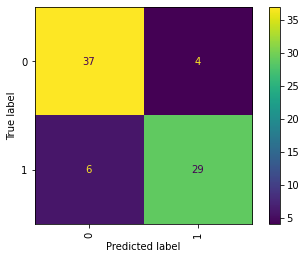

In [8]:
cm = confusion_matrix(y_test, y_hat)
display_labels = 1
cm_display2 = ConfusionMatrixDisplay(cm).plot(xticks_rotation='vertical')